In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("output_interval_result.csv")
df.head()

,primary_cases,secondary_cases,total_screens,total_detection,total_healed,strategy,interval_result,seed,C,V,m,k,treatment_prob,isolation_prob,result_length,screen_interval
0,42,144,1027.0,72.0,20.0,NoStrategies,5_4,1000,0.3,1.0,0.9,0.4,0.9,0.01,4,5
1,42,152,1038.0,71.0,22.0,NoStrategies,5_4,1001,0.3,1.0,0.9,0.4,0.9,0.01,4,5
2,42,157,1030.0,77.0,20.0,NoStrategies,5_4,1002,0.3,1.0,0.9,0.4,0.9,0.01,4,5
3,42,147,1064.0,74.0,22.0,NoStrategies,5_4,1003,0.3,1.0,0.9,0.4,0.9,0.01,4,5
4,42,124,1061.0,72.0,17.0,NoStrategies,5_4,1004,0.3,1.0,0.9,0.4,0.9,0.01,4,5


In [6]:
intervals = df["interval_result"].unique()
intervals

array(['5_4', '5_3', '5_2', '4_3', '4_2', '3_2', '3_1'], dtype=object)

In [7]:
df["ratio_ps"] =  df["secondary_cases"]/df["primary_cases"]
df["ratio_ps"].head()

0    3.428571
1    3.619048
2    3.738095
3    3.500000
4    2.952381
Name: ratio_ps, dtype: float64

In [10]:
result = df.groupby("interval_result")["ratio_ps"].mean()
result

interval_result
3_1    1.943333
3_2    2.429762
4_2    2.515952
4_3    2.962857
5_2    2.573333
5_3    3.062143
5_4    3.399762
Name: ratio_ps, dtype: float64

In [17]:
result.sort_values()

interval_result
3_1    1.943333
3_2    2.429762
4_2    2.515952
5_2    2.573333
4_3    2.962857
5_3    3.062143
5_4    3.399762
Name: ratio_ps, dtype: float64

<AxesSubplot:xlabel='interval_result'>

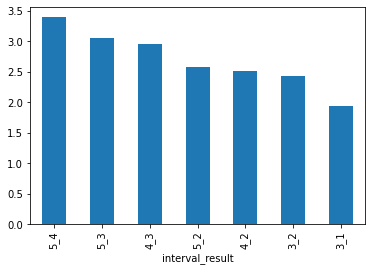

In [20]:
result.sort_values(ascending=False).plot.bar()

In [27]:
result_mat = np.zeros((5,4))

In [35]:
# Make 5x4 matrix from interval result
for idx , val in zip(result.index,result.values):
    i , j = str(idx).split("_")
    result_mat[int(i)-1,int(j)-1] = val

final = pd.DataFrame(result_mat[2:,:],index=range(3,6),columns=range(1,5))


In [38]:
final = final.replace(0,None)

In [39]:
final

,1,2,3,4
3,1.943333,2.429762,None,None
4,None,2.515952,2.962857,None
5,None,2.573333,3.062143,3.399762


In [40]:
# Secondary analysis for individual screen interval

df["interval_time"] = df["interval_result"].apply(lambda x : int(str(x).split("_")[0]))
df["result_time"] = df["interval_result"].apply(lambda x : int(str(x).split("_")[1]))
df[["interval_time","result_time"]].head()

,interval_time,result_time
0,5,4
1,5,4
2,5,4
3,5,4
4,5,4


<AxesSubplot:xlabel='interval_time'>

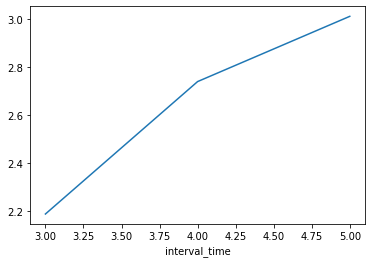

In [43]:
df.groupby("interval_time")["ratio_ps"].mean().plot()

<AxesSubplot:xlabel='result_time'>

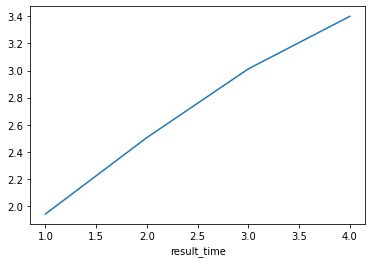

In [44]:
df.groupby("result_time")["ratio_ps"].mean().plot()

<AxesSubplot:xlabel='interval_time'>

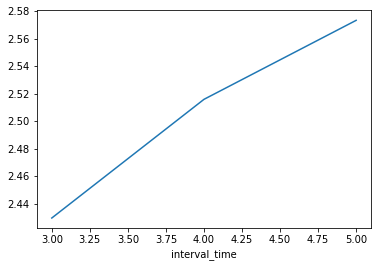

In [52]:
# Individualy constant values
check_val = 2
df[df["result_time"] == check_val].groupby("interval_time").mean()["ratio_ps"].plot()

<AxesSubplot:xlabel='result_time'>

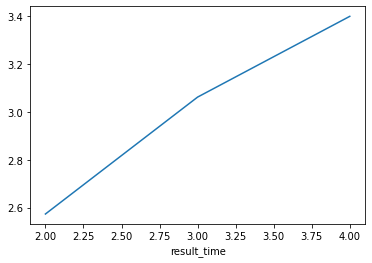

In [58]:
check_val = 5
df[df["interval_time"] == check_val].groupby("result_time").mean()["ratio_ps"].plot()
